# T9 Regression analysis

## Linear and polynomial regression 

We are given two generic data-sets consisting of observations at diffferent values of x. The task is to determine whether there exists a relationship between the independent variable x and the variable y? In other words, perform a regression analysis on the data-sets and determine whether changes in the independent variable predict changes in the dependent variable. 

We will use linear regression which assumes a linear (geometrically speaking: a line) relationship between the inpependent and dependent variable. Linear regression estimates the offset and the slope as predictors for the relationship. 

Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables $X^1$, $X^2$, $X^3$, as predictors. This approach provides a simple way to provide a non-linear fit to data.


The data is provided in the two files `data1-regression.npy` and `data2-regression.npy`. Remember that numpy binary files can loaded with `np.load([name of file])`. 




#### Performing regression analysis 'by hand'

Let's start by performing the regression analysis 'by hand', which means that we will successively perform the steps. 

1. Let's start by plotting both data-sets. Based on visual inspection, do you expect none, one or both data-sets to exhibit a relationship? 
1. Let's fit at line to the data using the numpy `polyfit()` function. This function takes, x, y and the degree of the polynomial function as input arguments and returns the polynomial coefficients. 
1. Calculate the predicted values based on the linear fit. The numpy `polyval()` function can be used for that, it takes the polynomial coefficients and the x values as input arguments. 
1. Plot both, the cloud of data and the fitted line. 
1. Calculate the $R^2$ value. Note that this requires to calculate the total sum of squares $SS_{tot}$ and the residual sum of squares $SS_{res}$. Check the formula for $R^2$ from the lecture. 
1. Plot the residual of both data-sets. What can you say about the statistics of the residuals?
1. Perform the regression now using polynomials of higher order (2,4,8,16) to predict the relationship betweeen x and y. How does $R^2$ change for both data-sets when using high-order polynomials? Plot $R^2$ as a function of the polynomial order. 

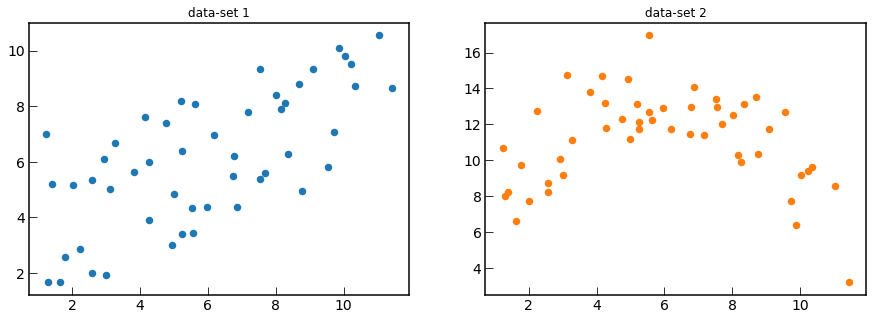

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data1 = np.load('data1-regression.npy')
data2 = np.load('data2-regression.npy')

fig = plt.figure(figsize=(15,5))

ax0 = fig.add_subplot(1,2,1)
ax0.set_title('data-set 1')
ax0.plot(data1[:,0],data1[:,1],'o')

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('data-set 2')
ax1.plot(data2[:,0],data2[:,1],'o',c='C1')

plt.show()

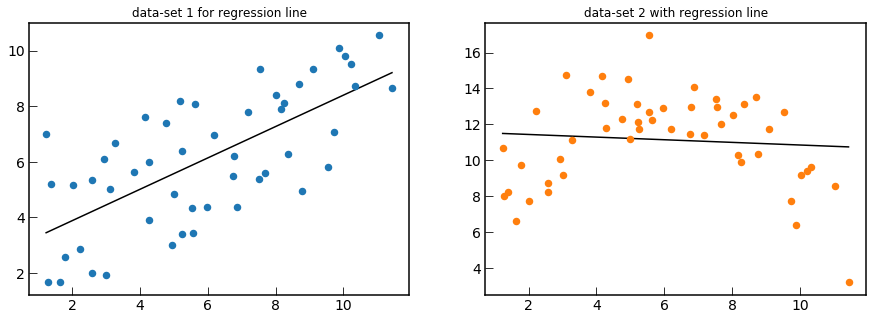

In [78]:
coeffs1poly1 = np.polyfit(data1[:,0],data1[:,1],1)
coeffs2poly1 = np.polyfit(data2[:,0],data2[:,1],1)

yPredict1 = np.polyval(coeffs1poly1,data1[:,0])
yPredict2 = np.polyval(coeffs2poly1,data2[:,0])

fig = plt.figure(figsize=(15,5))

ax0 = fig.add_subplot(1,2,1)
ax0.set_title('data-set 1 for regression line')
ax0.plot(data1[:,0],yPredict1,'black')
ax0.plot(data1[:,0],data1[:,1],'o')

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('data-set 2 with regression line')
ax1.plot(data2[:,0],yPredict2,'black')
ax1.plot(data2[:,0],data2[:,1],'o',c='C1')

plt.show()

In [79]:
SStot1 = np.sum((data1[:,1] - np.mean(data1[:,1]))**2)
SSres1 = np.sum((data1[:,1] - yPredict1)**2)
Rsquared1poly1 = 1 - SSres1/SStot1

SStot2 = np.sum((data2[:,1] - np.mean(data2[:,1]))**2)
SSres2 = np.sum((data2[:,1] - yPredict2)**2)
Rsquared2poly1 = 1 - SSres2/SStot2

print('R2 of data-set 1 : ',Rsquared1poly1)
print('R2 of data-set 2 : ',Rsquared2poly1)

R2 of data-set 1 :  0.48040822307112707
R2 of data-set 2 :  0.00693162747382714


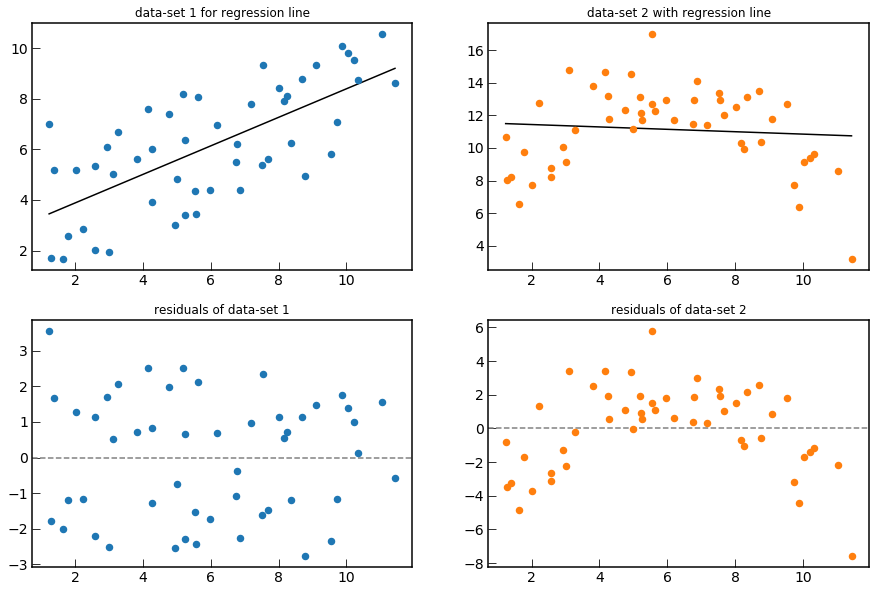

In [34]:
fig = plt.figure(figsize=(15,10))

ax0 = fig.add_subplot(2,2,1)
ax0.set_title('data-set 1 for regression line')
ax0.plot(data1[:,0],yPredict1,'black')
ax0.plot(data1[:,0],data1[:,1],'o')

ax2 = fig.add_subplot(2,2,3)
ax2.set_title('residuals of data-set 1')
ax2.axhline(y=0,ls='--',c='0.5')
ax2.plot(data1[:,0],data1[:,1]- yPredict1,'o')

ax1 = fig.add_subplot(2,2,2)
ax1.set_title('data-set 2 with regression line')
ax1.plot(data2[:,0],yPredict2,'black')
ax1.plot(data2[:,0],data2[:,1],'o',c='C1')

ax3 = fig.add_subplot(2,2,4)
ax3.set_title('residuals of data-set 2')
ax3.axhline(y=0,ls='--',c='0.5')
ax3.plot(data2[:,0],data2[:,1]- yPredict2,'o',c='C1')

plt.show()

The resdiuals of data-set 1 are uniformely distributed around 0. While the residuals of data-set 2 show a non-random dependence on x. Residuals for low x values are below 0, intermediate above 0 and high x values are again below 0. Such a dependence indicates a wrong model to describe the relationship between x and y. 

R2 of data-set 1 with polynomial order 1 :  0.48040822307112707
R2 of data-set 2 with polynomial order 1 :  0.00693162747382714
R2 of data-set 1 with polynomial order 2 :  0.48804421328334324
R2 of data-set 2 with polynomial order 2 :  0.5729275205200074
R2 of data-set 1 with polynomial order 4 :  0.4893969446707377
R2 of data-set 2 with polynomial order 4 :  0.5754583989002295
R2 of data-set 1 with polynomial order 8 :  0.5481063027374347
R2 of data-set 2 with polynomial order 8 :  0.6271927643275754
R2 of data-set 1 with polynomial order 16 :  0.5741764142178594
R2 of data-set 2 with polynomial order 16 :  0.7135660332002345


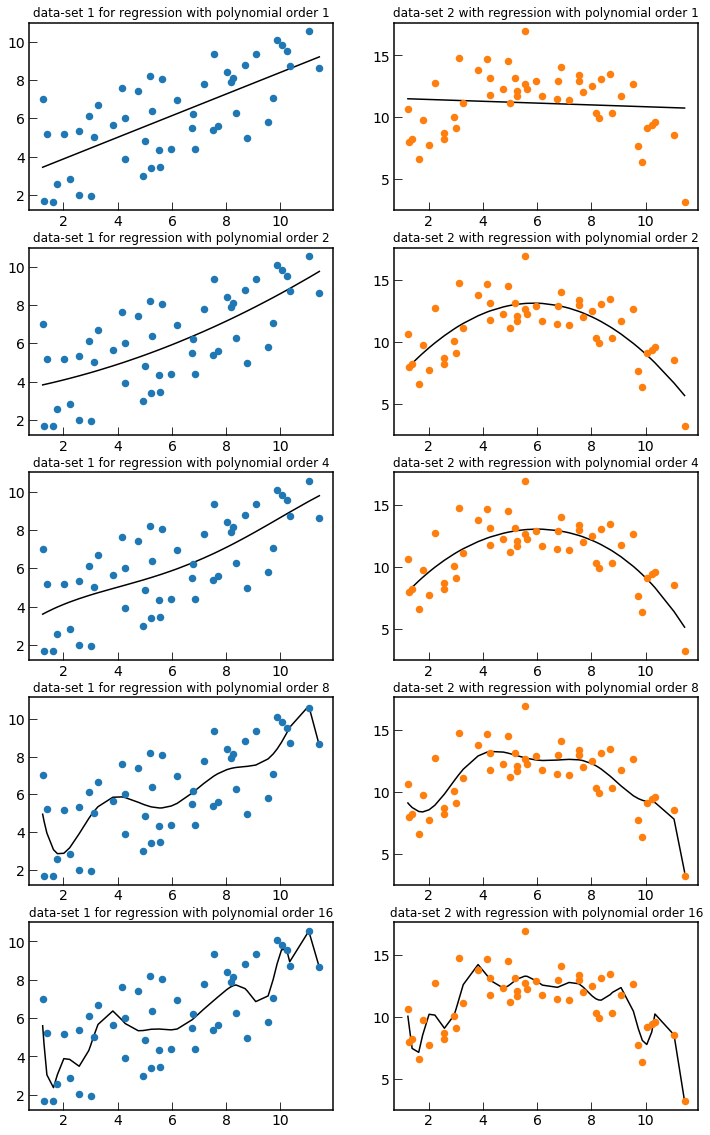

In [74]:
polynomialOrder = [1,2,4,8,16]

fig = plt.figure(figsize=(12,20))

R2list = []

for p in range(len(polynomialOrder)):
    coeffs1 = np.polyfit(data1[:,0],data1[:,1],polynomialOrder[p])
    coeffs2 = np.polyfit(data2[:,0],data2[:,1],polynomialOrder[p])


    yPredict1 = np.polyval(coeffs1,data1[:,0])
    yPredict2 = np.polyval(coeffs2,data2[:,0])

    
    ax0 = fig.add_subplot(5,2,2*p+1)
    ax0.set_title('data-set 1 for regression with polynomial order %s' % polynomialOrder[p])
    ax0.plot(data1[:,0],yPredict1,'black')
    ax0.plot(data1[:,0],data1[:,1],'o')

    ax1 = fig.add_subplot(5,2,2*p+2)
    ax1.set_title('data-set 2 with regression with polynomial order %s' % polynomialOrder[p])
    ax1.plot(data2[:,0],yPredict2,'black')
    ax1.plot(data2[:,0],data2[:,1],'o',c='C1')

    SStot1 = np.sum((data1[:,1] - np.mean(data1[:,1]))**2)
    SSres1 = np.sum((data1[:,1] - yPredict1)**2)
    Rsquared1 = 1 - SSres1/SStot1

    SStot2 = np.sum((data2[:,1] - np.mean(data2[:,1]))**2)
    SSres2 = np.sum((data2[:,1] - yPredict2)**2)
    Rsquared2 = 1 - SSres2/SStot2
    
    R2list.append([p,polynomialOrder[p],Rsquared1,Rsquared2])
    
    print('R2 of data-set 1 with polynomial order %s : ' % polynomialOrder[p],Rsquared1)
    print('R2 of data-set 2 with polynomial order %s : ' % polynomialOrder[p],Rsquared2)

plt.show()

Text(0, 0.5, 'R squared value')

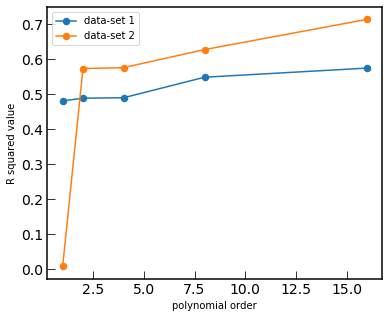

In [75]:

R2list = np.asarray(R2list)

fig = plt.figure(figsize=(6,5))
ax0 = fig.add_subplot(1,1,1)

ax0.plot(R2list[:,1],R2list[:,2],'o-',label='data-set 1')
ax0.plot(R2list[:,1],R2list[:,3],'o-',label='data-set 2')
plt.legend()

ax0.set_xlabel('polynomial order')
ax0.set_ylabel('R squared value')

The $R^2$ value of data-set 2 shows a considerable increase when going from linear to quadratic regression. Note that the increase in $R^2$ at polynomial order 6 and higher. Such increases need to be checked using cross-validation as they can be due to overfitting (picking up features in the data which are not generalizable). 

#### Performing regression using precompiled scipy function

Let's now perform the regression analysis using the `scipy.stats` function : `linregress()`. This function takes the x and the y values as input arguments. Compare the results  of `linregress()` with the polynomial coefficients and the $R^2$ values caluclated above. 

In [81]:
from scipy.stats import linregress

out1 = linregress(data1[:,0],data1[:,1])
print(out1,'R2 : ',out1[2]**2)
print('from above:',coeffs1poly1,Rsquared1poly1)
print()
out2 = linregress(data2[:,0],data2[:,1])
print(out2,'R2 : ',out2[2]**2)
print('from above:',coeffs2poly1,Rsquared2poly1)


LinregressResult(slope=0.5646252249395203, intercept=2.7531379734346424, rvalue=0.6931148700404044, pvalue=2.427701263920292e-08, stderr=0.08475504841128585) R2 :  0.4804082230711267
from above: [0.56462522 2.75313797] 0.48040822307112707

LinregressResult(slope=-0.07350698354253536, intercept=11.584252499850539, rvalue=-0.08325639599350372, pvalue=0.5654124412101944, stderr=0.12699304908639886) R2 :  0.006931627473827103
from above: [-0.07350698 11.5842525 ] 0.00693162747382714


## Logistic regression 

We have a data-set (stored in the variable `data3`) which contains data on how students passed a test. The x values are hours spent preparing for an exam and the y-values inform whether or not the student passed the exam. In turn, the y-values are 
binary taking either 0 - the student didn't pass the test - or 1 - the student passed the test - as values. Let's perform a logistic regression on this data-set. The result will help us decide how much time we should spend preparing the exam in order to have a good chance succeeding. 

In [6]:
data3 = np.array(([12,12.5,13.2,14,14.7,15.5,15.9,16.5,16.8,17,17.1,17.7,17.9,18.1,18.2,18.8,19.8,20.3,20.8,21,22],
                 [0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1]))

#### Perform logistic regression using scikit-learn function 

1. Plot the data. Based on visual inspection, how much time should you invest to have a good chance of passing the exam?

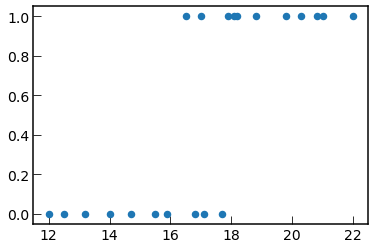

In [7]:
# your code

plt.plot(data3[0],data3[1],'o')

2. Perfrom the logistic regression using the code below. 

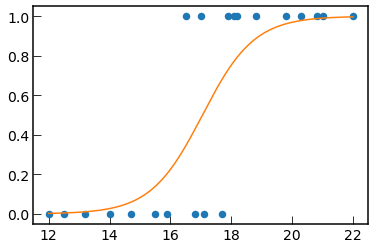

In [8]:
from sklearn.linear_model import LogisticRegression

displacement = np.mean(data3[0])

logRegression = LogisticRegression(solver='lbfgs')
logRegression.fit(data3[0].reshape(len(data3[0]),1)-displacement,data3[1])

x_pred = np.linspace(data3[0].min()-displacement,data3[0].max()-displacement,1000)
y_pred = logRegression.predict_proba(x_pred.reshape(len(x_pred),1))

plt.plot(data3[0],data3[1],'o')
plt.plot(x_pred+displacement,y_pred[:,1])
plt.show()


3. Based on the logistic regression, how much time should you invest preparing the exam in order to have a 50 % change or more to pass the test? 

In [9]:
# your code
mask = y_pred[:,1]>=0.5  # mask to get all predicted values of 0.5 and larger 
hoursHalf = (x_pred+displacement)[mask][0]

print('One should spend',np.round(hoursHalf,1),' hours to have a 50% chance to pass the exam.')


One should spend 17.1  hours to have a 50% chance to pass the exam.


## The end